In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn import datasets
from sklearn import manifold
%matplotlib inline

In [36]:
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
pixel_values, targets = data
targets = targets.astype(int)

In [37]:
pixel_values = pixel_values.values

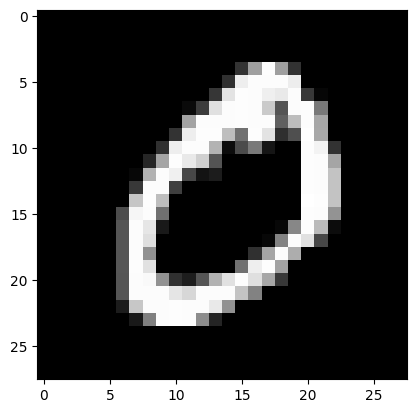

In [38]:
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap = 'gray')

In [39]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

c:\Users\ksjoe\.conda\envs\ml\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\ksjoe\.conda\envs\ml\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [41]:
tsne_df = pd.DataFrame(transformed_data, columns=["x", "y"])


In [43]:
tsne_df['targets'] = targets

In [45]:
tsne_df['targets'] = tsne_df['targets'].astype(int)

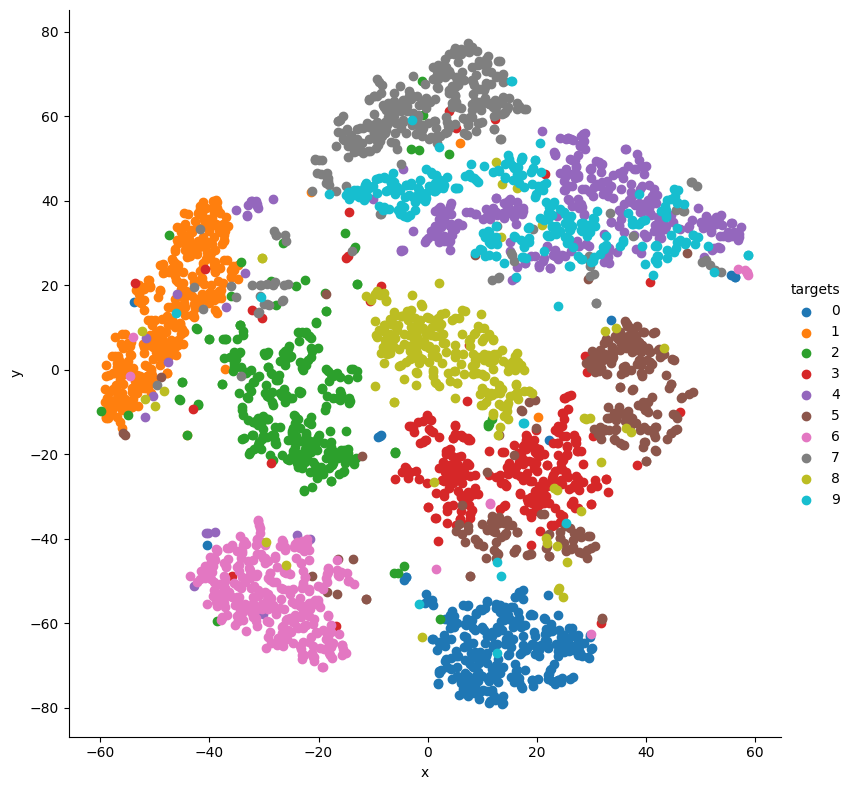

In [47]:
grid = sns.FacetGrid(tsne_df, hue="targets", height = 8)

grid.map(plt.scatter, "x", "y").add_legend()